In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zadchin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
## Read mozi_frmt.txt to pandas dataframe
mozi_df = pd.read_csv('data/mozi_frmt.txt', sep="\t", header=None)
conf_df = pd.read_csv('data/analects_frmt.txt', sep="\t", header=None)
mozi_df.columns = ['text']
conf_df.columns = ['text']

In [3]:
mozi_df.head()

,text
0,part i
1,the epitomes
2,being sympathetic to officers
3,qin shi
4,. to take control of a state and not be symp...


In [4]:
conf_df.head()

,text
0,the master is it not pleasant to learn with a...
1,and application?
2,is it not delightful to have friends coming f...
3,"is he not a man of complete virtue, who feels..."
4,men may take no note of him?


In [5]:
## stop words
stop_words = stopwords.words('english')

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # # stemm or lemmatise words
    # stemmed_words = []
    # for word in cleaned_words:
    #     word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
    #     stemmed_words.append(word)
    
    # converting list back to string
    return (" ".join(cleaned_words))

In [6]:
mozi_df['prep'] = mozi_df['text'].apply(preprocess)  
mozi_df.head()

,text,prep
0,part i,part
1,the epitomes,epitomes
2,being sympathetic to officers,sympathetic officers
3,qin shi,qin shi
4,. to take control of a state and not be symp...,take control state sympathetic


In [7]:
conf_df['prep'] = conf_df['text'].apply(preprocess)
conf_df.head()

,text,prep
0,the master is it not pleasant to learn with a...,master pleasant learn constant perseverance
1,and application?,application
2,is it not delightful to have friends coming f...,delightful friends coming distant quarters
3,"is he not a man of complete virtue, who feels...",man complete virtue feels discomposure though
4,men may take no note of him?,men may take note


In [8]:
## replace peopl in prep column with people
mozi_df['prep'] = mozi_df['prep'].str.replace('peopl', 'people')

In [9]:
conf_df['prep'] = conf_df['prep'].str.replace('peopl', 'people')

In [10]:
from collections import Counter
Counter(" ".join(mozi_df["prep"]).split()).most_common(10)

[('peoplee', 885),
 ('one', 681),
 ('world', 497),
 ('heaven', 474),
 ('master', 384),
 ('mo', 383),
 ('e', 367),
 ('said', 327),
 ('must', 319),
 ('like', 308)]

In [11]:
Counter(" ".join(conf_df["prep"]).split()).most_common(10)

[('said', 621),
 ('master', 526),
 ('man', 239),
 ('tsze', 179),
 ('may', 140),
 ('one', 126),
 ('virtue', 107),
 ('asked', 101),
 ('ch', 99),
 ('peoplee', 96)]

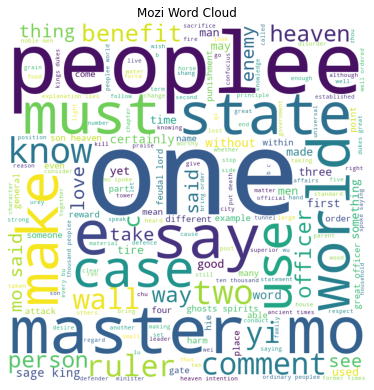

In [12]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in mozi_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Mozi Word Cloud")
plt.show()

In [13]:
## The number of unique words in Mozi
print("The number of unique words in Mozi is :", len(set(all_words.split())))

The number of unique words in Mozi is : 7544


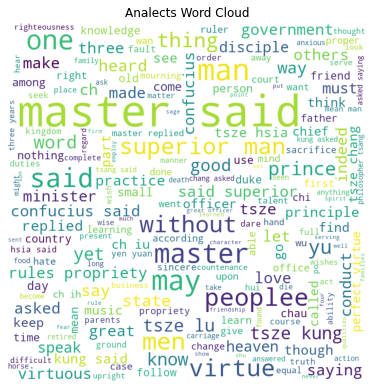

In [14]:
## wordcloud for analects
all_words = ''

for arg in conf_df["prep"]:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Analects Word Cloud")
plt.show()

In [15]:
print("The number of unique words in Confucius' Analect is :", len(set(all_words.split())))

The number of unique words in Confucius' Analect is : 2924


In [16]:
## THE TOP 10 words that are in mozi_df['prep'] but not in  conf_df['prep']
mozi_df_prep = mozi_df['prep'].str.split(expand=True).stack().value_counts()
conf_df_prep = conf_df['prep'].str.split(expand=True).stack().value_counts()
m_not_c = mozi_df_prep[~mozi_df_prep.index.isin(conf_df_prep.index)]

## delete element with strlength < 3
m_not_c = m_not_c[m_not_c.index.str.len() > 3]

## initialize a colum call count that count the word in index based of mozi_df['prep']
m_not_c = m_not_c.to_frame()

In [17]:
m_not_c['words'] = m_not_c.index
m_not_c['count'] = m_not_c['words'].apply(lambda x: mozi_df['prep'].str.count(x).sum())
# m_not_c.columns = ['count', 'words']

m_not_c.head()

In [ ]:
m_not_c.head(20)

,0,words,count
comment,240,comment,285
ghosts,188,ghosts,188
enemy,185,enemy,185
noble,164,noble,191
tire,143,tire,173
zhou,127,zhou,131
someone,118,someone,118
universal,116,universal,128
lies,103,lies,168
defence,91,defence,92


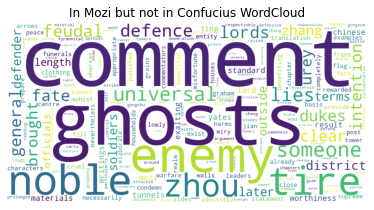

In [ ]:
## create a all_word string to store words vased on count 
all_words = ''

for i in range(m_not_c.shape[0]):
    for j in range(m_not_c.iloc[i, 0]):
        all_words += " " + m_not_c.iloc[i, 1] + " "

## all_words to list
all_words = all_words.split()

from collections import Counter
word_could_dict=Counter(all_words)
wordcloud = WordCloud(width = 1000, height = 500,  background_color ='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("In Mozi but not in Confucius WordCloud")
plt.show()

In [ ]:
## the top 20 words in conf_df['prep'] but not in mozi_df['prep']
c_not_m = conf_df_prep[~conf_df_prep.index.isin(mozi_df_prep.index)]

## print all the words in c_not_m
c_not_m = c_not_m[c_not_m.index.str.len() > 3]

c_not_m = c_not_m.to_frame()

print("The shape of c_not_m is: ", c_not_m.shape)

The shape of c_not_m is:  (914, 1)


In [ ]:
c_not_m['words'] = c_not_m.index
c_not_m['count'] = c_not_m['words'].apply(lambda x: conf_df['prep'].str.count(x).sum())

## arrange the dataframe by count
c_not_m = c_not_m.sort_values(by=['count'], ascending=False)

## remove rows with words 'lest', 'kwan', 'tsai'
c_not_m = c_not_m[~c_not_m['words'].isin(['lest', 'kwan', 'tsai', 'chieh', 'chwan', 'ning', 'sang', 'chil', 'tsze', 'kung', 'hsia', 'chung', 'tsang', 'chau', 'hwan'])]

c_not_m.head(20)

,0,words,count
tale,1,tale,18
philosopher,17,philosopher,17
talents,14,talents,14
retired,13,retired,13
band,3,band,12
airs,1,airs,11
earnest,8,earnest,11
friendship,10,friendship,11
month,5,month,10
till,1,till,10


Text(0.5, 1.0, 'In Confucius but not in Mozi WordCloud')

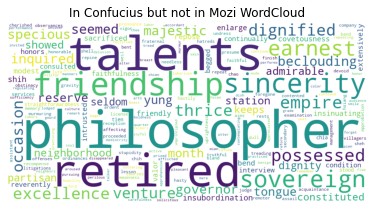

In [ ]:
all_words = ''

for i in range(c_not_m.shape[0]):
    for j in range(c_not_m.iloc[i, 0]):
        all_words += " " + c_not_m.iloc[i, 1] + " "

all_words = all_words.split()

from collections import Counter
word_could_dict=Counter(all_words)
wordcloud = WordCloud(width = 1000, height = 500,  background_color ='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("In Confucius but not in Mozi WordCloud")

In [ ]:
## the top 20 words that are in both mozi_df['prep'] and conf_df['prep']
df_comm = mozi_df_prep[mozi_df_prep.index.isin(conf_df_prep.index)]
## df_comm column name = [words, count]
df_comm = df_comm.to_frame()
df_comm.columns = ['count']
df_comm['words'] = df_comm.index
df_comm = df_comm[['words', 'count']]
df_comm.head(20)


,words,count
people,people,885
one,one,681
world,world,497
heaven,heaven,474
master,master,384
said,said,327
must,must,319
like,like,308
would,would,306
men,men,291


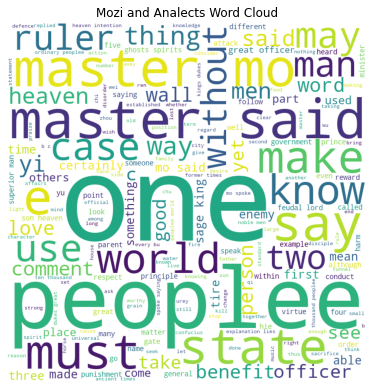

In [ ]:
## all_word equal to words in mozi_df['prep'] and conf_df['prep']

all_words = ''

for arg in mozi_df["prep"]:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "

for arg in conf_df["prep"]:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Mozi and Analects Word Cloud")
plt.show()